# 统计学基础教程

**学习目标**:
1. 理解常见概率分布（正态、二项、泊松）
2. 掌握假设检验的原理和应用
3. 理解中心极限定理
4. 学会进行A/B测试分析

**预计时间**: 20-25分钟

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom, poisson, t

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print('✅ 库导入完成！')

✅ 库导入完成！


## 第一部分: 概率分布

### 1.1 正态分布

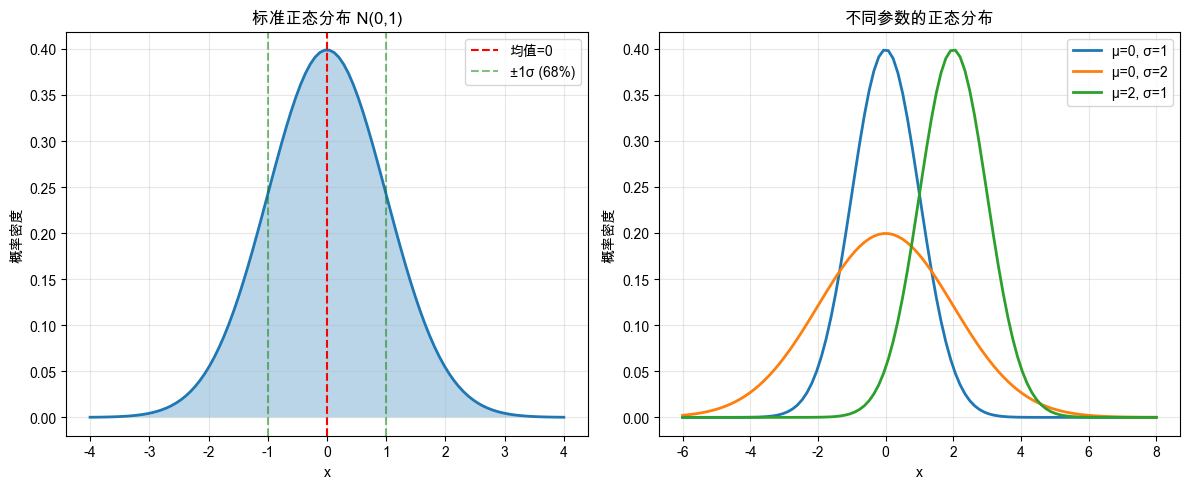

💡 68-95-99.7规则:
  68%的数据在 μ±1σ 范围内
  95%的数据在 μ±2σ 范围内
  99.7%的数据在 μ±3σ 范围内


In [ ]:
# 标准正态分布 N(0, 1)
mu, sigma = 0, 1
x = np.linspace(-4, 4, 100)  # linspace 生成等间距数值
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, linewidth=2)
plt.fill_between(x, y, alpha=0.3)
plt.axvline(mu, color='red', linestyle='--', label=f'均值={mu}')
plt.axvline(mu-sigma, color='green', linestyle='--', alpha=0.5)
plt.axvline(mu+sigma, color='green', linestyle='--', alpha=0.5, label='±1σ (68%)')
plt.title('标准正态分布 N(0,1)', fontsize=12, fontweight='bold')
plt.xlabel('x')
plt.ylabel('概率密度')
plt.legend()
plt.grid(True, alpha=0.3)

# 不同参数的正态分布
plt.subplot(1, 2, 2)
for mu, sigma in [(0, 1), (0, 2), (2, 1)]:
    x = np.linspace(-6, 8, 100)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, label=f'μ={mu}, σ={sigma}', linewidth=2)
plt.title('不同参数的正态分布', fontsize=12, fontweight='bold')
plt.xlabel('x')
plt.ylabel('概率密度')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('💡 68-95-99.7规则:')
print(f'  68%的数据在 μ±1σ 范围内')
print(f'  95%的数据在 μ±2σ 范围内')
print(f'  99.7%的数据在 μ±3σ 范围内')

### 1.2 二项分布

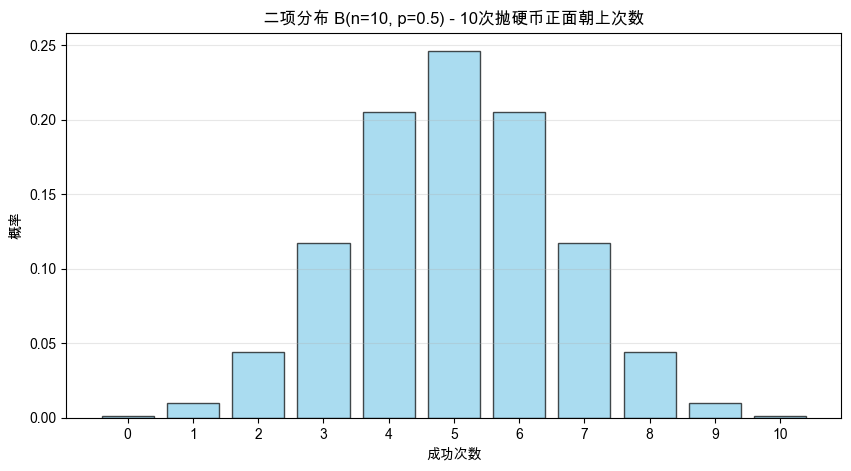

期望: E[X] = n*p = 5.0
方差: Var[X] = n*p*(1-p) = 2.5

例如: 恰好5次正面的概率 = 0.2461


In [3]:
# 二项分布示例：10次抛硬币
n, p = 10, 0.5
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.figure(figsize=(10, 5))
plt.bar(x, y, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'二项分布 B(n={n}, p={p}) - 10次抛硬币正面朝上次数', fontsize=12, fontweight='bold')
plt.xlabel('成功次数')
plt.ylabel('概率')
plt.xticks(x)
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f'期望: E[X] = n*p = {n*p}')
print(f'方差: Var[X] = n*p*(1-p) = {n*p*(1-p)}')
print(f'\n例如: 恰好5次正面的概率 = {binom.pmf(5, n, p):.4f}')

### 1.3 泊松分布

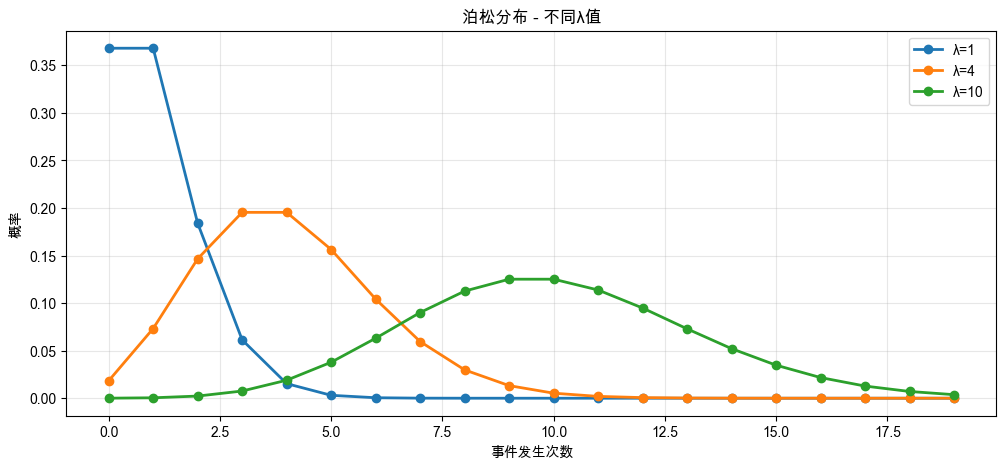

💡 应用场景:
  - 网站每小时访问量
  - 客服每天接到的电话数
  - 书中每页的印刷错误数


In [4]:
# 泊松分布示例：网站每小时访问量
lambdas = [1, 4, 10]
x = np.arange(0, 20)

plt.figure(figsize=(12, 5))
for lam in lambdas:
    y = poisson.pmf(x, lam)
    plt.plot(x, y, marker='o', label=f'λ={lam}', linewidth=2)

plt.title('泊松分布 - 不同λ值', fontsize=12, fontweight='bold')
plt.xlabel('事件发生次数')
plt.ylabel('概率')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print('💡 应用场景:')
print('  - 网站每小时访问量')
print('  - 客服每天接到的电话数')
print('  - 书中每页的印刷错误数')

## 第二部分: 假设检验

### 2.1 单样本t检验

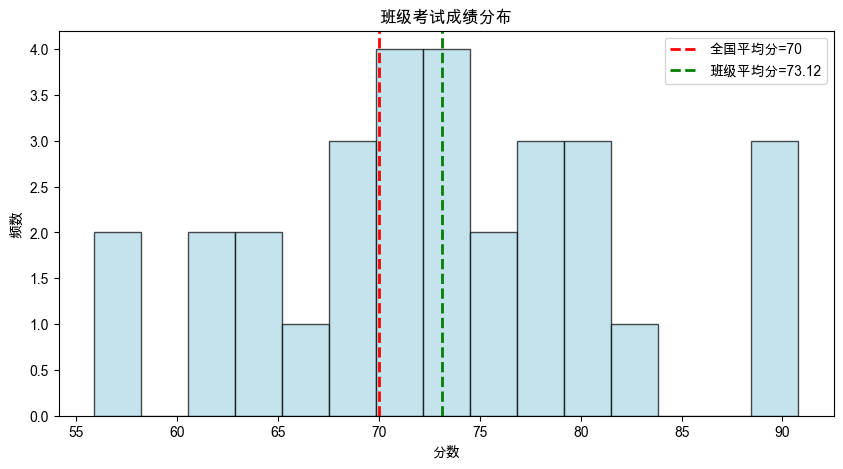

班级平均分: 73.12
t统计量: 1.8979
p值: 0.0339

判断: p值 < 0.05 → True
✅ 拒绝零假设，班级平均分显著高于全国平均分


In [5]:
# 场景：某班级考试成绩是否显著高于全国平均分70分？
np.random.seed(42)
class_scores = np.random.normal(75, 10, 30)  # 30个学生

plt.figure(figsize=(10, 5))
plt.hist(class_scores, bins=15, edgecolor='black', alpha=0.7, color='lightblue')
plt.axvline(70, color='red', linestyle='--', linewidth=2, label='全国平均分=70')
plt.axvline(class_scores.mean(), color='green', linestyle='--', linewidth=2, label=f'班级平均分={class_scores.mean():.2f}')
plt.title('班级考试成绩分布', fontsize=12, fontweight='bold')
plt.xlabel('分数')
plt.ylabel('频数')
plt.legend()
plt.show()

# 假设检验
# H0: μ = 70 (班级平均分等于全国平均分)
# H1: μ > 70 (班级平均分高于全国平均分)
t_stat, p_value = stats.ttest_1samp(class_scores, 70, alternative='greater')

print(f'班级平均分: {class_scores.mean():.2f}')
print(f't统计量: {t_stat:.4f}')
print(f'p值: {p_value:.4f}')
print(f'\n判断: p值 < 0.05 → {p_value < 0.05}')
if p_value < 0.05:
    print('✅ 拒绝零假设，班级平均分显著高于全国平均分')
else:
    print('❌ 不能拒绝零假设，没有充分证据表明班级平均分高于全国平均分')

### 2.2 双样本t检验（A/B测试）

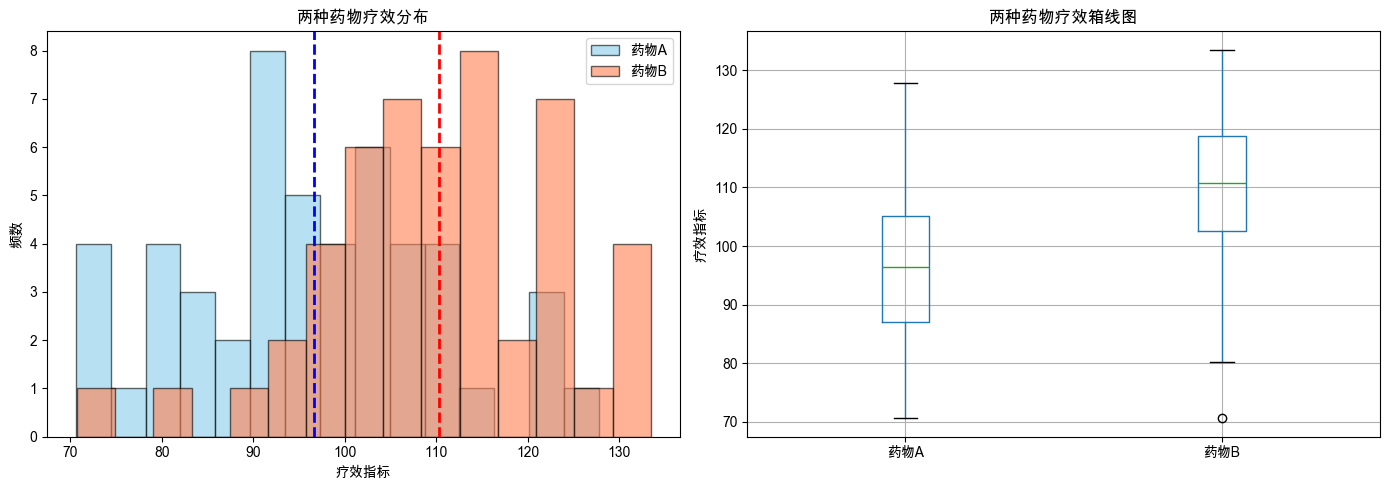

药物A平均疗效: 96.62
药物B平均疗效: 110.27
差异: 13.65

t统计量: -5.0301
p值: 0.0000

✅ 两种药物疗效有显著差异


In [6]:
# 场景：测试两种药物的疗效是否有差异
np.random.seed(42)
drug_a = np.random.normal(100, 15, 50)  # 药物A，50个病人
drug_b = np.random.normal(110, 15, 50)  # 药物B，50个病人

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图：分布对比
axes[0].hist(drug_a, bins=15, alpha=0.6, label='药物A', color='skyblue', edgecolor='black')
axes[0].hist(drug_b, bins=15, alpha=0.6, label='药物B', color='coral', edgecolor='black')
axes[0].axvline(drug_a.mean(), color='blue', linestyle='--', linewidth=2)
axes[0].axvline(drug_b.mean(), color='red', linestyle='--', linewidth=2)
axes[0].set_title('两种药物疗效分布', fontsize=12, fontweight='bold')
axes[0].set_xlabel('疗效指标')
axes[0].set_ylabel('频数')
axes[0].legend()

# 右图：箱线图
data_compare = pd.DataFrame({'药物A': drug_a, '药物B': drug_b})
data_compare.boxplot(ax=axes[1])
axes[1].set_title('两种药物疗效箱线图', fontsize=12, fontweight='bold')
axes[1].set_ylabel('疗效指标')

plt.tight_layout()
plt.show()

# 双样本t检验
t_stat, p_value = stats.ttest_ind(drug_a, drug_b)

print(f'药物A平均疗效: {drug_a.mean():.2f}')
print(f'药物B平均疗效: {drug_b.mean():.2f}')
print(f'差异: {drug_b.mean() - drug_a.mean():.2f}')
print(f'\nt统计量: {t_stat:.4f}')
print(f'p值: {p_value:.4f}')
if p_value < 0.05:
    print('\n✅ 两种药物疗效有显著差异')
else:
    print('\n❌ 两种药物疗效没有显著差异')

## 第三部分: 中心极限定理

### 3.1 可视化演示

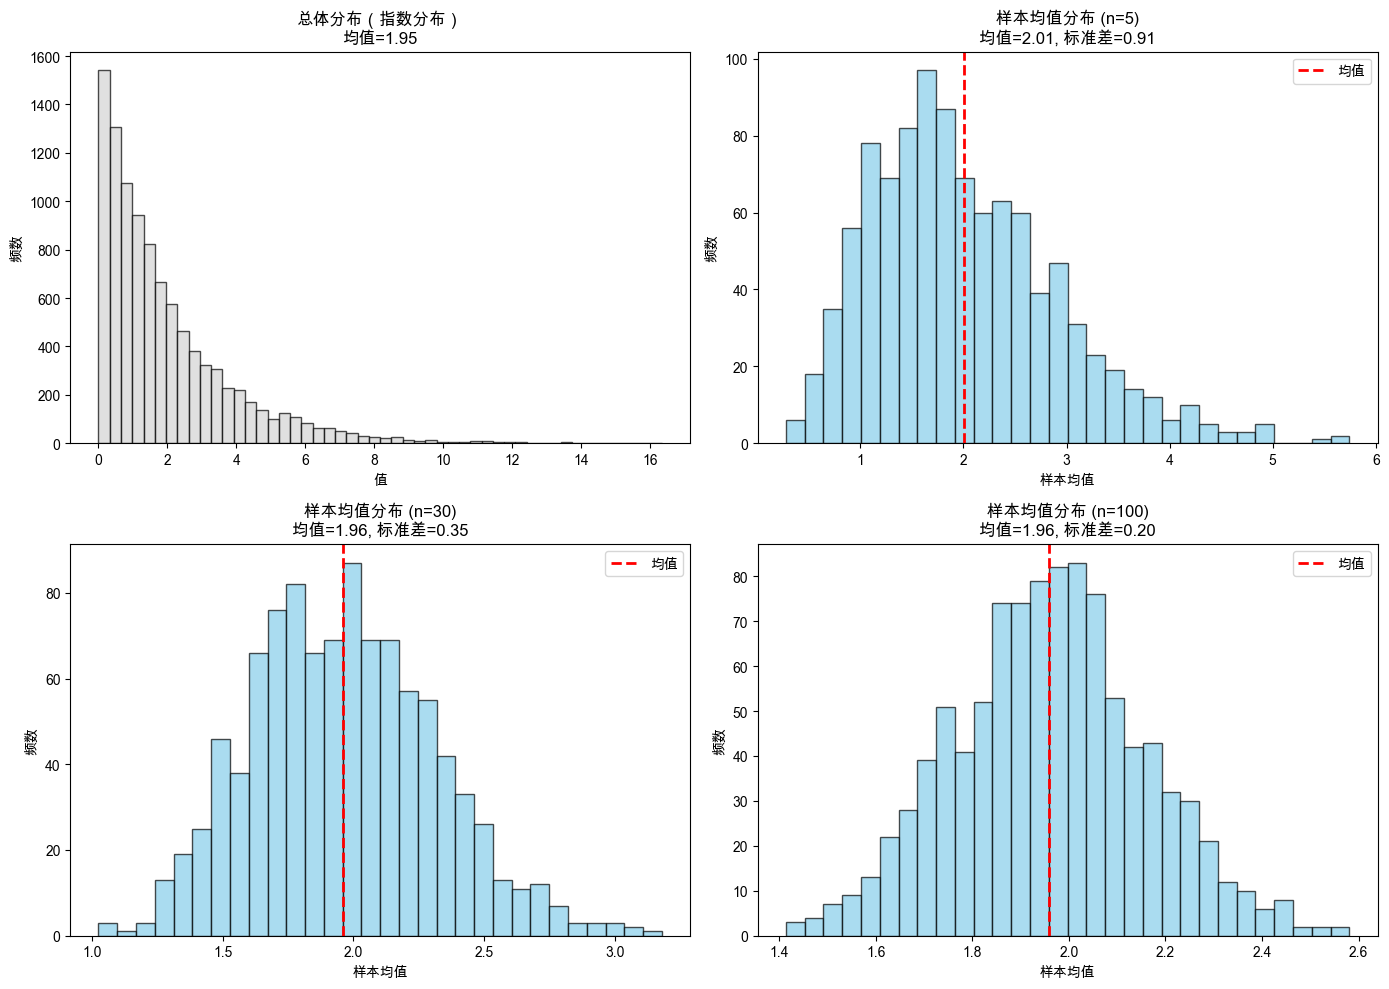

💡 中心极限定理:
  1. 无论总体分布是什么，样本均值的分布都趋近正态分布
  2. 样本量越大，越接近正态分布
  3. 样本均值的标准差 = 总体标准差 / sqrt(n)


In [7]:
# 从非正态分布中抽样，样本均值的分布趋近正态
np.random.seed(42)
population = np.random.exponential(2, 10000)  # 总体：指数分布（非正态）

# 不同样本量的均值分布
sample_sizes = [5, 30, 100]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 总体分布
axes[0, 0].hist(population, bins=50, edgecolor='black', alpha=0.7, color='lightgray')
axes[0, 0].set_title(f'总体分布（指数分布）\n均值={population.mean():.2f}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('值')
axes[0, 0].set_ylabel('频数')

# 不同样本量的样本均值分布
for idx, n in enumerate(sample_sizes):
    sample_means = [np.random.choice(population, n).mean() for _ in range(1000)]
    
    ax_idx = (idx+1) // 2, (idx+1) % 2
    axes[ax_idx].hist(sample_means, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[ax_idx].axvline(np.mean(sample_means), color='red', linestyle='--', linewidth=2, label='均值')
    axes[ax_idx].set_title(f'样本均值分布 (n={n})\n均值={np.mean(sample_means):.2f}, 标准差={np.std(sample_means):.2f}', 
                          fontsize=12, fontweight='bold')
    axes[ax_idx].set_xlabel('样本均值')
    axes[ax_idx].set_ylabel('频数')
    axes[ax_idx].legend()

plt.tight_layout()
plt.show()

print('💡 中心极限定理:')
print('  1. 无论总体分布是什么，样本均值的分布都趋近正态分布')
print('  2. 样本量越大，越接近正态分布')
print('  3. 样本均值的标准差 = 总体标准差 / sqrt(n)')

## 🎯 综合练习: A/B测试分析

A/B测试结果:
版本A: 1000次展示, 50次点击, 转化率=5.00%
版本B: 1000次展示, 65次点击, 转化率=6.50%
转化率差异: 1.50%

t统计量: -1.4408
p值: 0.1498

❌ 结论: 两个版本的转化率没有显著差异，建议继续测试或收集更多数据


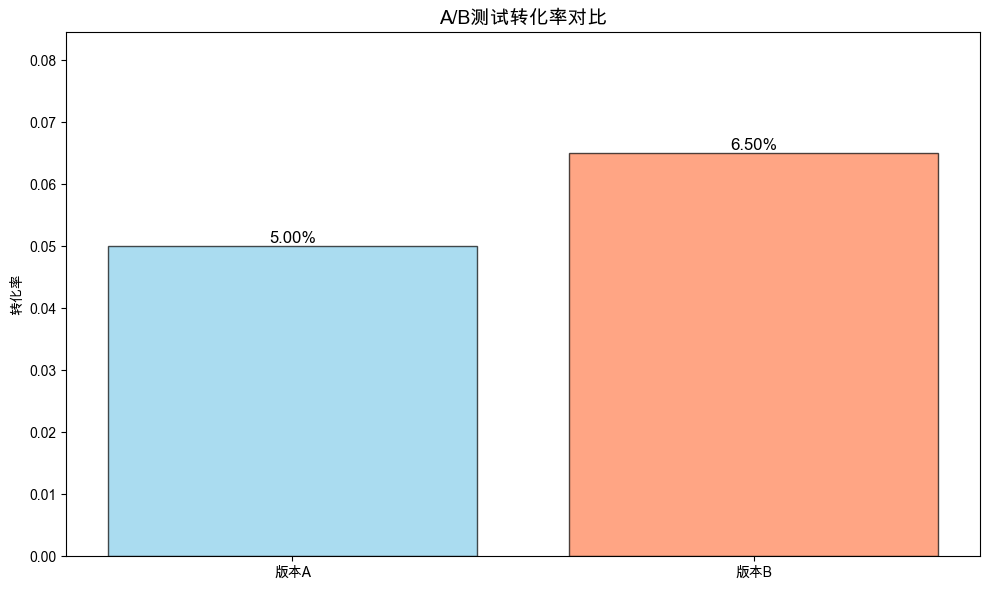

In [8]:
# 场景：电商网站测试两个版本的购买按钮
np.random.seed(42)

# 版本A和版本B的数据
n_A, n_B = 1000, 1000
clicks_A = 50  # A版点击50次
clicks_B = 65  # B版点击65次

conversion_A = clicks_A / n_A
conversion_B = clicks_B / n_B

print('A/B测试结果:')
print(f'版本A: {n_A}次展示, {clicks_A}次点击, 转化率={conversion_A:.2%}')
print(f'版本B: {n_B}次展示, {clicks_B}次点击, 转化率={conversion_B:.2%}')
print(f'转化率差异: {(conversion_B - conversion_A):.2%}')

# 创建数据
group_A = np.array([1]*clicks_A + [0]*(n_A-clicks_A))
group_B = np.array([1]*clicks_B + [0]*(n_B-clicks_B))

# t检验
t_stat, p_value = stats.ttest_ind(group_A, group_B)

print(f'\nt统计量: {t_stat:.4f}')
print(f'p值: {p_value:.4f}')

if p_value < 0.05:
    print('\n✅ 结论: 版本B的转化率显著高于版本A，建议采用版本B')
else:
    print('\n❌ 结论: 两个版本的转化率没有显著差异，建议继续测试或收集更多数据')

# 可视化
plt.figure(figsize=(10, 6))
categories = ['版本A', '版本B']
conversions = [conversion_A, conversion_B]
colors = ['skyblue', 'coral']

bars = plt.bar(categories, conversions, color=colors, edgecolor='black', alpha=0.7)
plt.title('A/B测试转化率对比', fontsize=14, fontweight='bold')
plt.ylabel('转化率')
plt.ylim(0, max(conversions) * 1.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{conversions[i]:.2%}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 🎯 总结

### 核心知识点

1. **概率分布**:
   - 正态分布: 自然界最常见，68-95-99.7规则
   - 二项分布: 独立重复试验
   - 泊松分布: 单位时间事件数

2. **假设检验**:
   - 零假设H0 vs 备择假设H1
   - p值 < 0.05 → 拒绝零假设
   - 应用: A/B测试、药效对比

3. **中心极限定理**:
   - 样本均值趋近正态分布
   - 样本量越大越准确
   - 统计推断的理论基础

### 下一步

- ✅ 完成练习
- 📚 学习 [07-linear-algebra.ipynb](./07-linear-algebra.ipynb)
- 🚀 应用到项目中

**恭喜完成统计学基础！** 🎉